<a href="https://colab.research.google.com/github/tobnie/gaze_predictor_nn/blob/main/train_nn_subject_specific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Package:


In [1]:
!git clone -l -s https://github.com/tobnie/gaze_predictor_nn.git cloned_repo

%cd cloned_repo

Cloning into 'cloned_repo'...
remote: Enumerating objects: 2232, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 2232 (delta 199), reused 267 (delta 165), pack-reused 1922
Receiving objects: 100% (2232/2232), 1.08 GiB | 30.08 MiB/s, done.
Resolving deltas: 100% (524/524), done.
Checking out files: 100% (1192/1192), done.
/content/cloned_repo


General Hyperparameters:

In [2]:
epochs = 200

# FC NN - Full State Input Flat

Configuration for NN:

In [3]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [4]:
from gaze_predictor.fully_connected import FCNetwork

fc_nn = FCNetwork(name='fc_nn', configuration = nn_configuration, subject_specific=True)
fc_nn.create_model()

X shape: (6815, 300)
Created model for fc_nn:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 512)               154112    
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 260,861
Trainable params: 260,861
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [5]:
fc_nn.train()

Epoch 1/200
137/137 [==============================] - 1s 4ms/step - loss: 5.0339 - root_mean_squared_error: 2.2436 - val_loss: 3.7371 - val_root_mean_squared_error: 1.9331
Epoch 2/200
137/137 [==============================] - 0s 3ms/step - loss: 2.4401 - root_mean_squared_error: 1.5621 - val_loss: 2.3019 - val_root_mean_squared_error: 1.5172
Epoch 3/200
137/137 [==============================] - 0s 3ms/step - loss: 1.5104 - root_mean_squared_error: 1.2290 - val_loss: 1.7930 - val_root_mean_squared_error: 1.3390
Epoch 4/200
137/137 [==============================] - 0s 3ms/step - loss: 1.0231 - root_mean_squared_error: 1.0115 - val_loss: 1.4964 - val_root_mean_squared_error: 1.2233
Epoch 5/200
137/137 [==============================] - 0s 3ms/step - loss: 0.8304 - root_mean_squared_error: 0.9112 - val_loss: 1.5280 - val_root_mean_squared_error: 1.2361
Epoch 6/200
137/137 [==============================] - 0s 3ms/step - loss: 0.6696 - root_mean_squared_error: 0.8183 - val_loss: 1.5196 

Evaluate Model:

43/43 [==============================] - 0s 2ms/step - loss: 1.0349 - root_mean_squared_error: 1.0173

Test root_mean_squared_error: 1.0173200368881226

Test loss: 1.0349401235580444


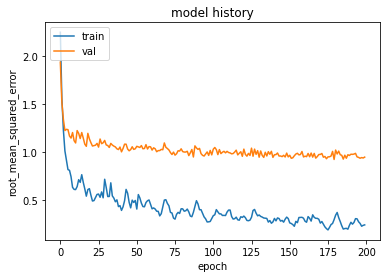

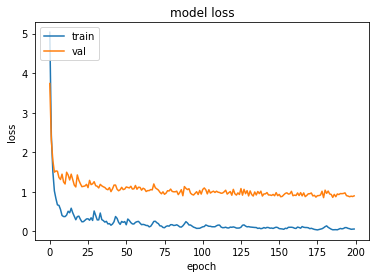

(1.0173200368881226, 1.0349401235580444)

In [6]:
fc_nn.evaluate()

# FC NN - Player Position Input

Configuration for NN:

In [7]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 2,
    'input_shape': (2,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [8]:
from gaze_predictor.fully_connected import FCNetworkPlayerPosInput

fc_nn_player_pos = FCNetworkPlayerPosInput(name='fc_nn_player_pos', configuration = nn_configuration, subject_specific=True)
fc_nn_player_pos.create_model()

X shape: (6815, 2)
Created model for fc_nn_player_pos:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 2)                 6         
                                                                 
 Hidden1 (Dense)             (None, 512)               1536      
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 17,991
Trainable params: 17,991
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [9]:
fc_nn_player_pos.train()

Epoch 1/200
137/137 [==============================] - 1s 3ms/step - loss: 6.7360 - root_mean_squared_error: 2.5954 - val_loss: 6.2264 - val_root_mean_squared_error: 2.4953
Epoch 2/200
137/137 [==============================] - 0s 2ms/step - loss: 5.9085 - root_mean_squared_error: 2.4307 - val_loss: 6.0144 - val_root_mean_squared_error: 2.4524
Epoch 3/200
137/137 [==============================] - 0s 2ms/step - loss: 5.6737 - root_mean_squared_error: 2.3819 - val_loss: 5.9579 - val_root_mean_squared_error: 2.4409
Epoch 4/200
137/137 [==============================] - 0s 2ms/step - loss: 5.5482 - root_mean_squared_error: 2.3555 - val_loss: 5.9449 - val_root_mean_squared_error: 2.4382
Epoch 5/200
137/137 [==============================] - 0s 2ms/step - loss: 5.4332 - root_mean_squared_error: 2.3309 - val_loss: 5.8188 - val_root_mean_squared_error: 2.4122
Epoch 6/200
137/137 [==============================] - 0s 2ms/step - loss: 5.5038 - root_mean_squared_error: 2.3460 - val_loss: 5.7271 

Evaluate Model:

43/43 [==============================] - 0s 1ms/step - loss: 5.0382 - root_mean_squared_error: 2.2446

Test root_mean_squared_error: 2.244601011276245

Test loss: 5.038233757019043


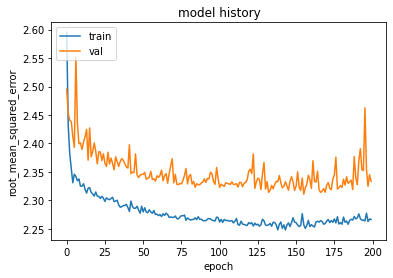

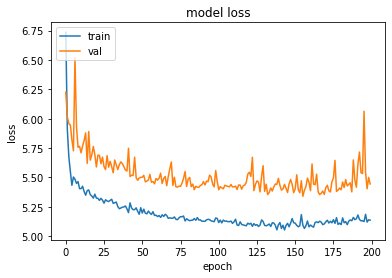

(2.244601011276245, 5.038233757019043)

In [10]:
fc_nn_player_pos.evaluate()

# FC NN - Situation (+ Player Pos) Input

7x7 Situation Input:

X shape: (4191, 51)
Created model for fc_nn_situation:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 51)                2652      
                                                                 
 Hidden1 (Dense)             (None, 512)               26624     
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 45,725
Trainable params: 45,725
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
84/84 [==============================] - 1s 4ms/step - loss: 3.1087 - root_mean_squared_error: 1.7631 - val_lo

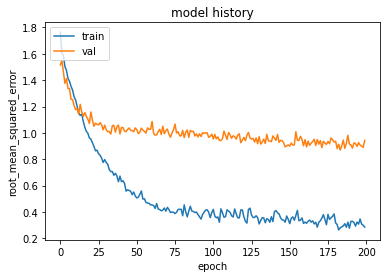

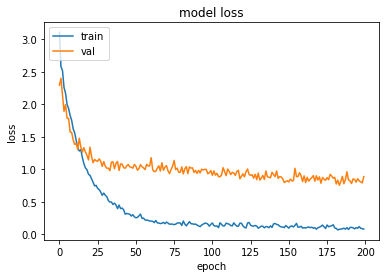

(0.9022365808486938, 0.8140308260917664)

In [11]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 51,
    'input_shape': (51,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration, subject_specific=True)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

5x5 Situation Input:

X shape: (4191, 27)
Created model for fc_nn_situation:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 27)                756       
                                                                 
 Hidden1 (Dense)             (None, 512)               14336     
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 31,541
Trainable params: 31,541
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
84/84 [==============================] - 1s 4ms/step - loss: 3.7500 - root_mean_squared_error: 1.9365 - val_lo

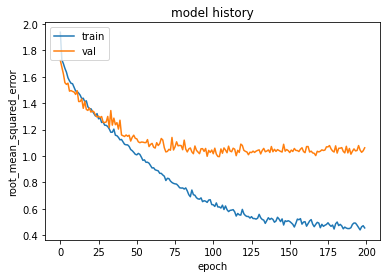

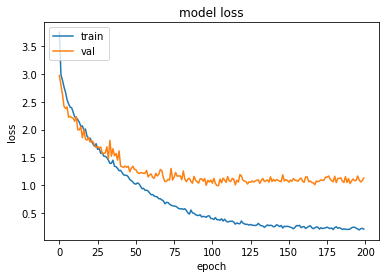

(1.0273853540420532, 1.0555206537246704)

In [12]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 27,
    'input_shape': (27,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration, situation_size=5, subject_specific=True)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

3x3 Situation Input:

X shape: (4191, 11)
Created model for fc_nn_situation:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 11)                132       
                                                                 
 Hidden1 (Dense)             (None, 512)               6144      
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 22,725
Trainable params: 22,725
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
84/84 [==============================] - 1s 4ms/step - loss: 3.5912 - root_mean_squared_error: 1.8950 - val_lo

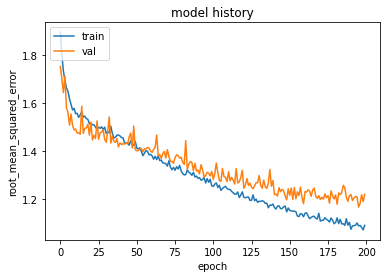

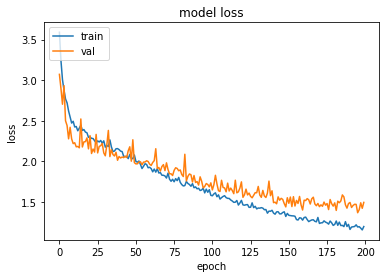

(1.2143995761871338, 1.4747662544250488)

In [13]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 11,
    'input_shape': (11,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration, situation_size=3, subject_specific=True)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

# ConvNet

Configuration for NN:

In [14]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [15]:
from gaze_predictor.convolutional import ConvNetwork

conv_nn = ConvNetwork(name='conv_nn', configuration = nn_configuration, subject_specific=True)
conv_nn.create_model()

Created model for conv_nn:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 15, 20, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 10, 64)        0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 8, 10, 128)        73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 Dense1 (Dense)            

Train Model:

In [16]:
conv_nn.train()

Epoch 1/200
137/137 [==============================] - 2s 10ms/step - loss: 5.7861 - root_mean_squared_error: 2.4054 - val_loss: 5.7339 - val_root_mean_squared_error: 2.3945
Epoch 2/200
137/137 [==============================] - 1s 9ms/step - loss: 4.7014 - root_mean_squared_error: 2.1683 - val_loss: 5.2140 - val_root_mean_squared_error: 2.2834
Epoch 3/200
137/137 [==============================] - 1s 10ms/step - loss: 2.9181 - root_mean_squared_error: 1.7082 - val_loss: 3.2566 - val_root_mean_squared_error: 1.8046
Epoch 4/200
137/137 [==============================] - 1s 9ms/step - loss: 1.7031 - root_mean_squared_error: 1.3050 - val_loss: 2.0970 - val_root_mean_squared_error: 1.4481
Epoch 5/200
137/137 [==============================] - 1s 9ms/step - loss: 1.1058 - root_mean_squared_error: 1.0515 - val_loss: 1.8968 - val_root_mean_squared_error: 1.3773
Epoch 6/200
137/137 [==============================] - 1s 10ms/step - loss: 0.7995 - root_mean_squared_error: 0.8942 - val_loss: 1.64

Evaluate Model:

43/43 [==============================] - 0s 3ms/step - loss: 1.3351 - root_mean_squared_error: 1.1555

Test root_mean_squared_error: 1.155476450920105

Test loss: 1.3351259231567383


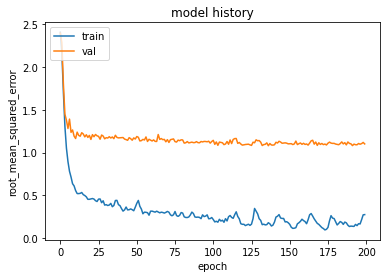

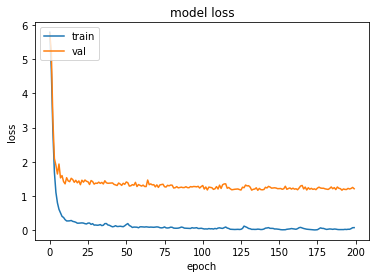

(1.155476450920105, 1.3351259231567383)

In [17]:
conv_nn.evaluate()

# ConvNet 3D

Configuration for NN:

In [18]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 3),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [19]:
from gaze_predictor.convolutional_3d import ConvNetwork3D

conv_nn_3d = ConvNetwork3D(name='conv_nn_3d', configuration = nn_configuration, subject_specific=True)
conv_nn_3d.create_model()

Created model for conv_nn_3d:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1_In (Conv2D)           (None, 15, 20, 12)        912       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 10, 12)        0         
 2D)                                                             
                                                                 
 Conv2 (Conv2D)              (None, 8, 10, 32)         3488      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 Dense1 (Dense)         

Train Model:

In [20]:
conv_nn_3d.train()

Epoch 1/200
137/137 [==============================] - 2s 8ms/step - loss: 5.8961 - root_mean_squared_error: 2.4282 - val_loss: 5.7764 - val_root_mean_squared_error: 2.4034
Epoch 2/200
137/137 [==============================] - 1s 8ms/step - loss: 5.1977 - root_mean_squared_error: 2.2799 - val_loss: 5.4779 - val_root_mean_squared_error: 2.3405
Epoch 3/200
137/137 [==============================] - 1s 8ms/step - loss: 4.5224 - root_mean_squared_error: 2.1266 - val_loss: 4.4646 - val_root_mean_squared_error: 2.1130
Epoch 4/200
137/137 [==============================] - 1s 7ms/step - loss: 3.4531 - root_mean_squared_error: 1.8582 - val_loss: 3.4322 - val_root_mean_squared_error: 1.8526
Epoch 5/200
137/137 [==============================] - 1s 8ms/step - loss: 2.4906 - root_mean_squared_error: 1.5782 - val_loss: 2.9676 - val_root_mean_squared_error: 1.7227
Epoch 6/200
137/137 [==============================] - 1s 8ms/step - loss: 2.0173 - root_mean_squared_error: 1.4203 - val_loss: 2.5925 

Evaluate Model:

43/43 [==============================] - 0s 3ms/step - loss: 1.4269 - root_mean_squared_error: 1.1945

Test root_mean_squared_error: 1.1945326328277588

Test loss: 1.426908254623413


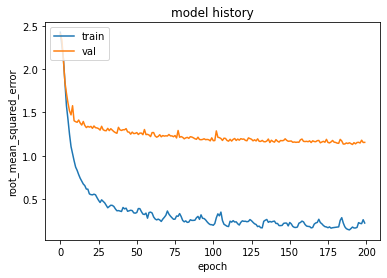

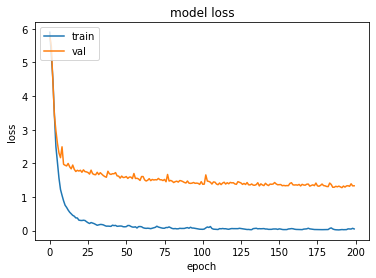

(1.1945326328277588, 1.426908254623413)

In [21]:
conv_nn_3d.evaluate()

# ConvNet MultiInput - Situation plus Region

Configuration for NN:

In [22]:
import tensorflow as tf

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': tf.keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [23]:
from gaze_predictor.situation_input_architectures.conv_multi_input import MultiInputConvNetwork

multi_input_conv_nn = MultiInputConvNetwork(name='multi_input_conv_nn', configuration = nn_configuration, subject_specific=True)
multi_input_conv_nn.create_model()

X1 Input Shape:  (7, 7, 1)
X2 Input Shape:  (2,)
First Layer output: KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 64), dtype=tf.float32, name=None), name='Conv1/Relu:0', description="created by layer 'Conv1'")
got to end of cnn layer
after concatenation:
 KerasTensor(type_spec=TensorSpec(shape=(None, 514), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")
got to end of dense layer
Created model for multi_input_conv_nn:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7, 1)]    0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 7, 7, 64)     1664        ['input_1[0][0]']                
     

Train Model:

In [24]:
multi_input_conv_nn.train()

Epoch 1/200
137/137 [==============================] - 2s 9ms/step - loss: 5.9667 - root_mean_squared_error: 2.4427 - val_loss: 5.5270 - val_root_mean_squared_error: 2.3510
Epoch 2/200
137/137 [==============================] - 1s 8ms/step - loss: 5.2032 - root_mean_squared_error: 2.2810 - val_loss: 5.1512 - val_root_mean_squared_error: 2.2696
Epoch 3/200
137/137 [==============================] - 1s 8ms/step - loss: 4.6882 - root_mean_squared_error: 2.1652 - val_loss: 5.3452 - val_root_mean_squared_error: 2.3120
Epoch 4/200
137/137 [==============================] - 1s 8ms/step - loss: 4.2187 - root_mean_squared_error: 2.0539 - val_loss: 4.3436 - val_root_mean_squared_error: 2.0841
Epoch 5/200
137/137 [==============================] - 1s 8ms/step - loss: 3.7252 - root_mean_squared_error: 1.9301 - val_loss: 4.0686 - val_root_mean_squared_error: 2.0171
Epoch 6/200
137/137 [==============================] - 1s 8ms/step - loss: 3.3037 - root_mean_squared_error: 1.8176 - val_loss: 3.6407 

Evaluate Model:

43/43 [==============================] - 1s 17ms/step - loss: 1.7774 - root_mean_squared_error: 1.3332

Test root_mean_squared_error: 1.333203911781311

Test loss: 1.7774326801300049


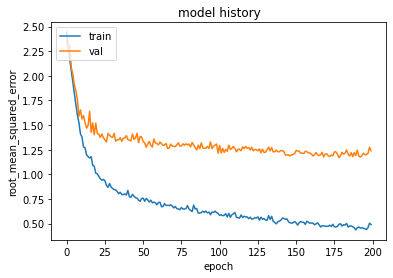

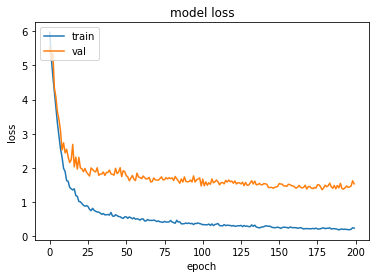

(1.333203911781311, 1.7774326801300049)

In [25]:
multi_input_conv_nn.evaluate()

# Recurrent Network

Configuration for NN:

In [3]:
from tensorflow import keras
from gaze_predictor.recurrent_network import RecurrentNetwork

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

In [4]:
def create_and_run_lstm_model(timesteps, stride):
  lstm_nn = RecurrentNetwork(name='lstm_nn', configuration = nn_configuration, timesteps=timesteps, stride=stride, subject_specific=True)
  lstm_nn.create_model()
  lstm_nn.train()
  lstm_nn.evaluate()

Run for all timestep and stride combinations:

Train Data before: (4200, 15000)
Test Data before: (1050, 15000)
X_train after reshape: (4200, 50, 300)
X_test after reshape: (1050, 50, 300)
Created model for lstm_nn_timesteps=50_stride=10:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
________________________________________________________

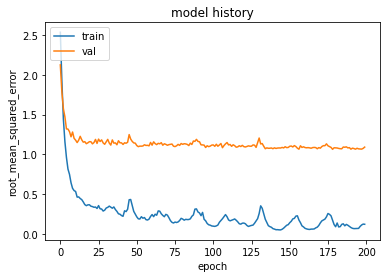

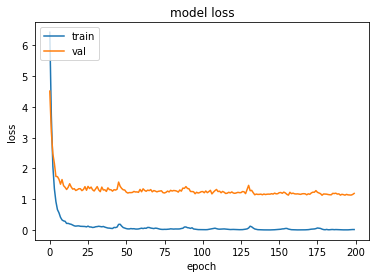

Train Data before: (3110, 15000)
Test Data before: (777, 15000)
X_train after reshape: (3110, 50, 300)
X_test after reshape: (777, 50, 300)
Created model for lstm_nn_timesteps=50_stride=20:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
________________________________________________________

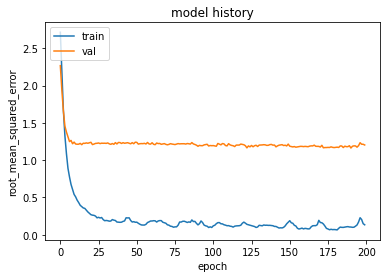

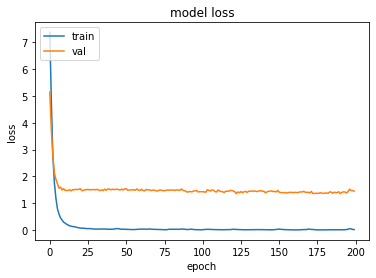

Train Data before: (3093, 30000)
Test Data before: (773, 30000)
X_train after reshape: (3093, 100, 300)
X_test after reshape: (773, 100, 300)
Created model for lstm_nn_timesteps=100_stride=10:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_____________________________________________________

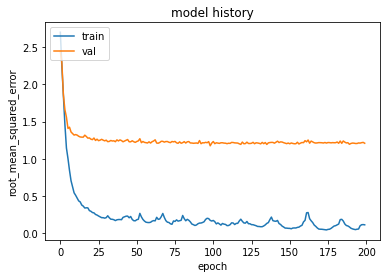

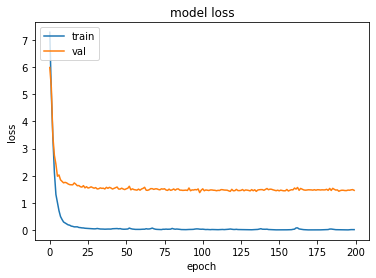

Train Data before: (1364, 30000)
Test Data before: (340, 30000)
X_train after reshape: (1364, 100, 300)
X_test after reshape: (340, 100, 300)
Created model for lstm_nn_timesteps=100_stride=20:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_____________________________________________________

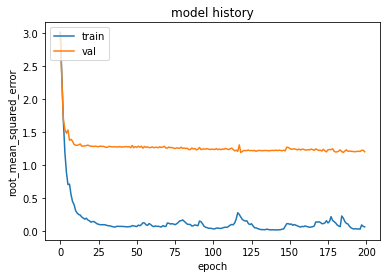

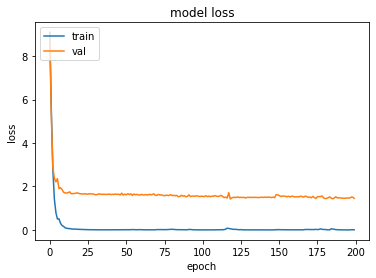

In [5]:
from itertools import product

timesteps = [50, 100]
strides = [10, 20]

for t, s in product(timesteps, strides):
  create_and_run_lstm_model(t, s)

# Recurrent Convolutional Network - Full State Input (Single Layer FM)

Configuration for NN:

In [2]:
epochs=100

In [3]:
from tensorflow import keras
from gaze_predictor.recurrent_conv_network import RecurrentConvNetwork

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

In [4]:
def create_and_run_lstm_model(timesteps, stride):
  lstm_conv_nn = RecurrentConvNetwork(name='lstm_conv_nn', configuration = nn_configuration, timesteps=timesteps, stride=stride, subject_specific=True)
  lstm_conv_nn.create_model()
  lstm_conv_nn.train()
  lstm_conv_nn.evaluate()

Run for all timestep and stride combinations:

Train Data before: (4200, 15000)
Test Data before: (1050, 15000)
X_train after reshape: (4200, 50, 15, 20, 1)
X_test after reshape: (1050, 50, 15, 20, 1)
Created model for lstm_conv_nn_timesteps=50_stride=10:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTMConv (ConvLSTM2D)       (None, 15, 20, 16)        27264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 10, 16)        0         
 )                                                               
                                                                 
 Conv (Conv2D)               (None, 8, 10, 64)         9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 64)         0         
 2D)                                                             
                                             

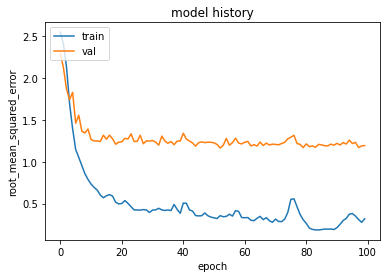

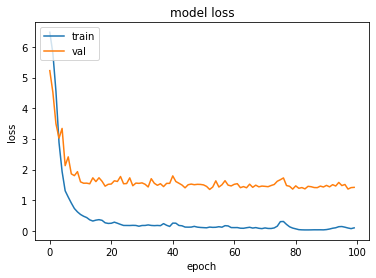

Train Data before: (3110, 15000)
Test Data before: (777, 15000)
X_train after reshape: (3110, 50, 15, 20, 1)
X_test after reshape: (777, 50, 15, 20, 1)
Created model for lstm_conv_nn_timesteps=50_stride=20:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTMConv (ConvLSTM2D)       (None, 15, 20, 16)        27264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 10, 16)        0         
 2D)                                                             
                                                                 
 Conv (Conv2D)               (None, 8, 10, 64)         9280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 5, 64)         0         
 2D)                                                             
                                             

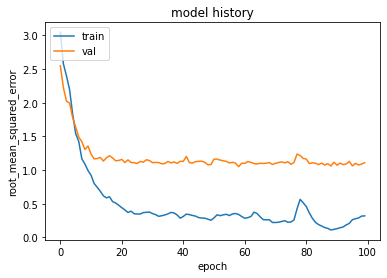

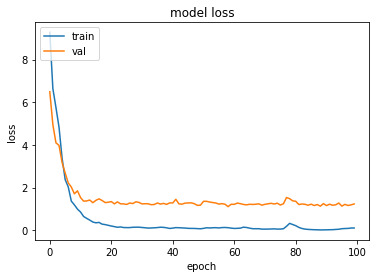

Train Data before: (3093, 30000)
Test Data before: (773, 30000)
X_train after reshape: (3093, 100, 15, 20, 1)
X_test after reshape: (773, 100, 15, 20, 1)
Created model for lstm_conv_nn_timesteps=100_stride=10:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTMConv (ConvLSTM2D)       (None, 15, 20, 16)        27264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 10, 16)        0         
 2D)                                                             
                                                                 
 Conv (Conv2D)               (None, 8, 10, 64)         9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 5, 64)         0         
 2D)                                                             
                                          

In [ ]:
from itertools import product

timesteps = [50, 100]
strides = [10, 20]

for t, s in product(timesteps, strides):
  create_and_run_lstm_model(t, s)

Train Data before: (3093, 30000)
Test Data before: (773, 30000)
X_train after reshape: (3093, 100, 15, 20, 1)
X_test after reshape: (773, 100, 15, 20, 1)
Created model for lstm_conv_nn_timesteps=100_stride=10:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTMConv (ConvLSTM2D)       (None, 15, 20, 16)        27264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 10, 16)        0         
 )                                                               
                                                                 
 Conv (Conv2D)               (None, 8, 10, 64)         9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 64)         0         
 2D)                                                             
                                            

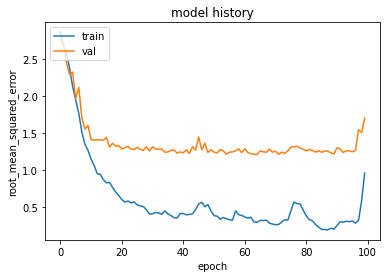

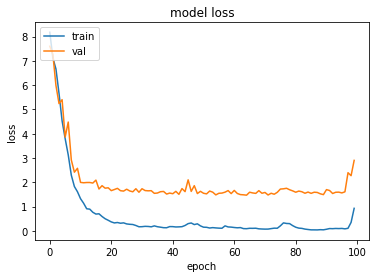

In [5]:
create_and_run_lstm_model(100, 10)

# Recurrent Convolutional Network - Situation Input


Configuration for NN:

In [6]:
from tensorflow import keras
from gaze_predictor.recurrent_conv_network import RecurrentConvNetworkSituationInput

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Train Data before: (1364, 4900)
Test Data before: (340, 4900)
X_train after reshape: (1364, 100, 7, 7, 1)
X_test after reshape: (340, 100, 7, 7, 1)
Created model for lstm_conv_nn_situation_input_timesteps=100_stride=20:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTMConv (ConvLSTM2D)       (None, 7, 7, 32)          105728    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 Conv (Conv2D)               (None, 4, 4, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 Dense1 (Dense)              (No

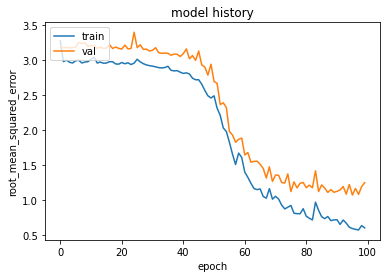

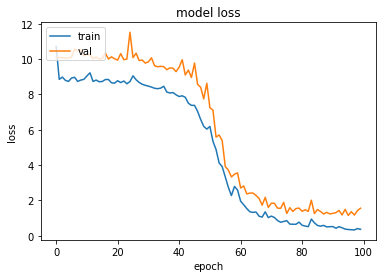

(1.3095765113830566, 1.7149906158447266)

In [7]:
lstm_conv_nn = RecurrentConvNetworkSituationInput(name='lstm_conv_nn_situation_input', configuration = nn_configuration, subject_specific=True)
lstm_conv_nn.create_model()
lstm_conv_nn.train()
lstm_conv_nn.evaluate()

# FC NN - ELU

Configuration for NN:

In [8]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [9]:
from gaze_predictor.fully_connected import FCNetworkELU

fc_nn_elu = FCNetworkELU(name='fc_nn_elu', configuration = nn_configuration, subject_specific=True)
fc_nn_elu.create_model()

Created model for fc_nn_elu:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 512)               154112    
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 260,861
Trainable params: 260,861
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [10]:
fc_nn_elu.train()

Epoch 1/100
137/137 [==============================] - 1s 6ms/step - loss: 5.5669 - root_mean_squared_error: 2.3594 - val_loss: 4.2422 - val_root_mean_squared_error: 2.0597
Epoch 2/100
137/137 [==============================] - 1s 5ms/step - loss: 3.2375 - root_mean_squared_error: 1.7993 - val_loss: 3.1852 - val_root_mean_squared_error: 1.7847
Epoch 3/100
137/137 [==============================] - 1s 5ms/step - loss: 2.2839 - root_mean_squared_error: 1.5112 - val_loss: 2.5648 - val_root_mean_squared_error: 1.6015
Epoch 4/100
137/137 [==============================] - 1s 5ms/step - loss: 1.6485 - root_mean_squared_error: 1.2839 - val_loss: 2.0480 - val_root_mean_squared_error: 1.4311
Epoch 5/100
137/137 [==============================] - 1s 5ms/step - loss: 1.2304 - root_mean_squared_error: 1.1092 - val_loss: 1.9417 - val_root_mean_squared_error: 1.3935
Epoch 6/100
137/137 [==============================] - 1s 5ms/step - loss: 1.0152 - root_mean_squared_error: 1.0076 - val_loss: 1.7677 

Evaluate Model:

43/43 [==============================] - 0s 2ms/step - loss: 1.2400 - root_mean_squared_error: 1.1135

Test root_mean_squared_error: 1.1135379076004028

Test loss: 1.239966630935669


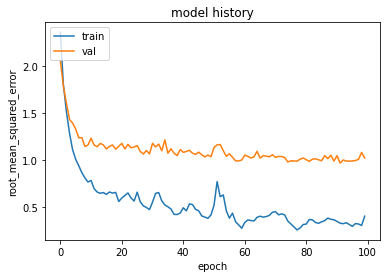

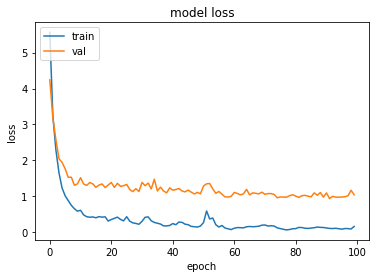

(1.1135379076004028, 1.239966630935669)

In [11]:
fc_nn_elu.evaluate()

# FC NN - Dropout

Configuration for NN:

In [12]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [13]:
from gaze_predictor.fully_connected import FCNetworkDropout

fc_nn_dropout = FCNetworkDropout(name='fc_nn_dropout', configuration = nn_configuration, subject_specific=True)
fc_nn_dropout.create_model()

Created model for fc_nn_dropout:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 512)               154112    
                                                                 
 DropOut1 (Dropout)          (None, 512)               0         
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 DropOut2 (Dropout)          (None, 32)                0         
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 260,861

Train Model:

In [14]:
fc_nn_dropout.train()

Epoch 1/100
137/137 [==============================] - 1s 7ms/step - loss: 6.2468 - root_mean_squared_error: 2.4994 - val_loss: 4.5120 - val_root_mean_squared_error: 2.1242
Epoch 2/100
137/137 [==============================] - 1s 6ms/step - loss: 3.8781 - root_mean_squared_error: 1.9693 - val_loss: 2.8142 - val_root_mean_squared_error: 1.6776
Epoch 3/100
137/137 [==============================] - 1s 6ms/step - loss: 3.0225 - root_mean_squared_error: 1.7385 - val_loss: 2.5830 - val_root_mean_squared_error: 1.6072
Epoch 4/100
137/137 [==============================] - 1s 6ms/step - loss: 2.4021 - root_mean_squared_error: 1.5499 - val_loss: 2.2693 - val_root_mean_squared_error: 1.5064
Epoch 5/100
137/137 [==============================] - 1s 6ms/step - loss: 2.2340 - root_mean_squared_error: 1.4947 - val_loss: 2.3971 - val_root_mean_squared_error: 1.5483
Epoch 6/100
137/137 [==============================] - 1s 6ms/step - loss: 2.0276 - root_mean_squared_error: 1.4239 - val_loss: 2.0009 

Evaluate Model:

43/43 [==============================] - 0s 2ms/step - loss: 1.1638 - root_mean_squared_error: 1.0788

Test root_mean_squared_error: 1.0787849426269531

Test loss: 1.1637769937515259


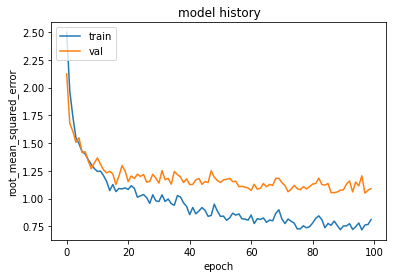

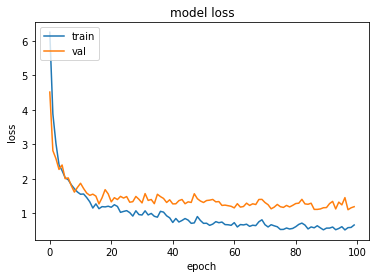

(1.0787849426269531, 1.1637769937515259)

In [15]:
fc_nn_dropout.evaluate()

# FC NN - BatchNormalization

Configuration for NN:

In [16]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [17]:
from gaze_predictor.fully_connected import FCNetworkBatchNormalization

fc_nn_batch_norm = FCNetworkBatchNormalization(name='fc_nn_batch_norm', configuration = nn_configuration, subject_specific=True)
fc_nn_batch_norm.create_model()

Created model for fc_nn_batch_norm:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 512)               154112    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 Output (Dense)   

Train Model:

In [18]:
fc_nn_batch_norm.train()

Epoch 1/100
137/137 [==============================] - 2s 7ms/step - loss: 14.1486 - root_mean_squared_error: 3.7615 - val_loss: 14.0299 - val_root_mean_squared_error: 3.7456
Epoch 2/100
137/137 [==============================] - 1s 9ms/step - loss: 4.8689 - root_mean_squared_error: 2.2066 - val_loss: 7.3400 - val_root_mean_squared_error: 2.7092
Epoch 3/100
137/137 [==============================] - 1s 6ms/step - loss: 2.1637 - root_mean_squared_error: 1.4709 - val_loss: 2.9857 - val_root_mean_squared_error: 1.7279
Epoch 4/100
137/137 [==============================] - 1s 7ms/step - loss: 1.6721 - root_mean_squared_error: 1.2931 - val_loss: 2.7069 - val_root_mean_squared_error: 1.6453
Epoch 5/100
137/137 [==============================] - 1s 6ms/step - loss: 1.5246 - root_mean_squared_error: 1.2347 - val_loss: 2.2076 - val_root_mean_squared_error: 1.4858
Epoch 6/100
137/137 [==============================] - 1s 6ms/step - loss: 1.3116 - root_mean_squared_error: 1.1452 - val_loss: 2.117

Evaluate Model:

43/43 [==============================] - 0s 2ms/step - loss: 1.9965 - root_mean_squared_error: 1.4130

Test root_mean_squared_error: 1.4129700660705566

Test loss: 1.9964842796325684


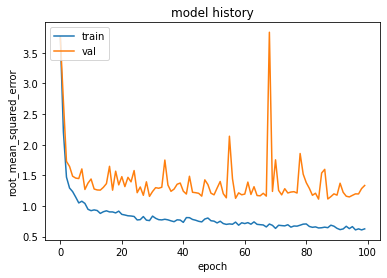

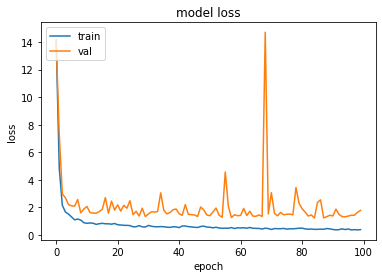

(1.4129700660705566, 1.9964842796325684)

In [19]:
fc_nn_batch_norm.evaluate()

In [ ]:
# fc_nn.save_model()
# conv_nn.save_model()
# conv_nn_3d.save_model()
# fc_nn_dropout.save_model()
# fc_nn_batch_norm.save_model()
# fc_nn_elu.save_model()

In [ ]:
# !zip -r /content/file.zip /content
# from google.colab import files
# files.download("/content/file.zip")